In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import ast

In [2]:
data = pd.read_csv('biosensing_data.csv')

In [3]:
df = pd.DataFrame(data)
df.head()

,Sample_ID,Biosensor_Type,Pathogen_ID,Pathogen_Class,Microbial_Signature,Signal_Quality,Normalized_Data,Classification_Label
0,sample_0001,Electrochemical,pathogen_0001,Virus,"[0.686348465859171, 0.3519711095416459, 0.4792...",1,"[1.0, 0.5128169247104654, 0.6982014062284271]",Hepatitis
1,sample_0002,Electrochemical,pathogen_0002,Virus,"[0.511492541035177, 0.5906264985400667, 0.4373...",1,"[0.8660169198292051, 1.0, 0.7405203790625393]",Influenza
2,sample_0003,Optical,pathogen_0003,Fungi,"[0.34381169127876693, 0.3692560064866732, 0.11...",1,"[0.9310930228325897, 1.0, 0.316247859168712]",Aspergillus
3,sample_0004,Electrochemical,pathogen_0004,Bacteria,"[0.6662803385340104, 0.46467267273050455, 0.45...",1,"[1.0, 0.6974131545783041, 0.6764207193004899]",L. monocytogenes
4,sample_0005,Electrochemical,pathogen_0005,Bacteria,"[0.7666226216524994, 0.38892208052687616, 0.38...",1,"[1.0, 0.5073188157277855, 0.5053355232959593]",Salmonella


In [4]:
#Encode Disease Names to Numbers
label_encoder = LabelEncoder()
df.iloc[:, -1] = label_encoder.fit_transform(df.iloc[:, -1])

In [5]:
df.head()

,Sample_ID,Biosensor_Type,Pathogen_ID,Pathogen_Class,Microbial_Signature,Signal_Quality,Normalized_Data,Classification_Label
0,sample_0001,Electrochemical,pathogen_0001,Virus,"[0.686348465859171, 0.3519711095416459, 0.4792...",1,"[1.0, 0.5128169247104654, 0.6982014062284271]",4
1,sample_0002,Electrochemical,pathogen_0002,Virus,"[0.511492541035177, 0.5906264985400667, 0.4373...",1,"[0.8660169198292051, 1.0, 0.7405203790625393]",5
2,sample_0003,Optical,pathogen_0003,Fungi,"[0.34381169127876693, 0.3692560064866732, 0.11...",1,"[0.9310930228325897, 1.0, 0.316247859168712]",0
3,sample_0004,Electrochemical,pathogen_0004,Bacteria,"[0.6662803385340104, 0.46467267273050455, 0.45...",1,"[1.0, 0.6974131545783041, 0.6764207193004899]",6
4,sample_0005,Electrochemical,pathogen_0005,Bacteria,"[0.7666226216524994, 0.38892208052687616, 0.38...",1,"[1.0, 0.5073188157277855, 0.5053355232959593]",8


In [6]:
diesase = df.iloc[:,-1]

In [7]:
# Convert the string representation of lists to actual lists
df['Normalized_Data'] = df['Normalized_Data'].apply(ast.literal_eval)

# Expand the list of arrays into separate columns
df_expanded = pd.DataFrame(df['Normalized_Data'].tolist(), columns=['Feature1', 'Feature2', 'Feature3'])

print(df_expanded.head())  # Check the first few rows

   Feature1  Feature2  Feature3
0  1.000000  0.512817  0.698201
1  0.866017  1.000000  0.740520
2  0.931093  1.000000  0.316248
3  1.000000  0.697413  0.676421
4  1.000000  0.507319  0.505336


C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory le

Text(0.5, 1.0, 'KMeans cluster')

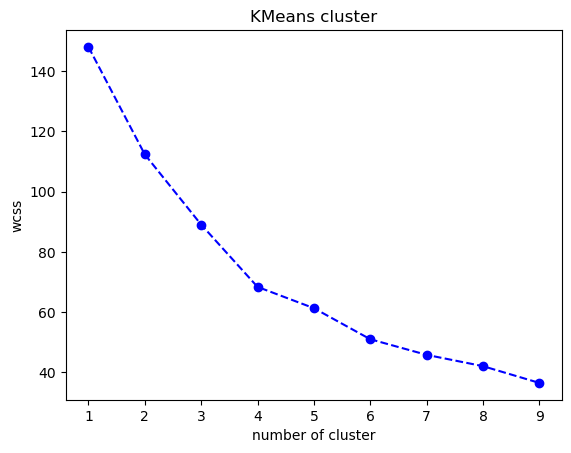

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss =[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_expanded)
    wcss.append(kmeans.inertia_)

#plot elbow method
plt.plot(range(1,10), wcss, marker='o', color='b', linestyle='--')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.title('KMeans cluster')

In [19]:
#running clustering
n_clusters=3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df_expanded)
centroids = kmeans.cluster_centers_

df_expanded['clusters'] = clusters

C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


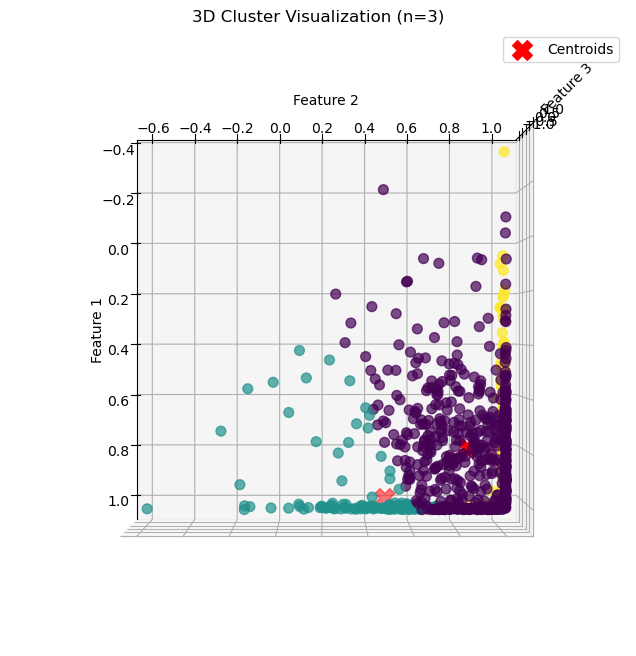

In [29]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
scatter = ax.scatter(df_expanded['Feature1'], df_expanded['Feature2'], df_expanded['Feature3'], 
                    c=clusters, cmap='viridis', s=50, alpha=0.7)

# Plot centroids
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
          marker='X', s=200, c='red', label='Centroids')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.view_init(elev=90, azim=0) # for 3d change 30 , 60
plt.title(f'3D Cluster Visualization (n={n_clusters})')
plt.legend()
plt.show()

In [11]:
#hierarchical clustering

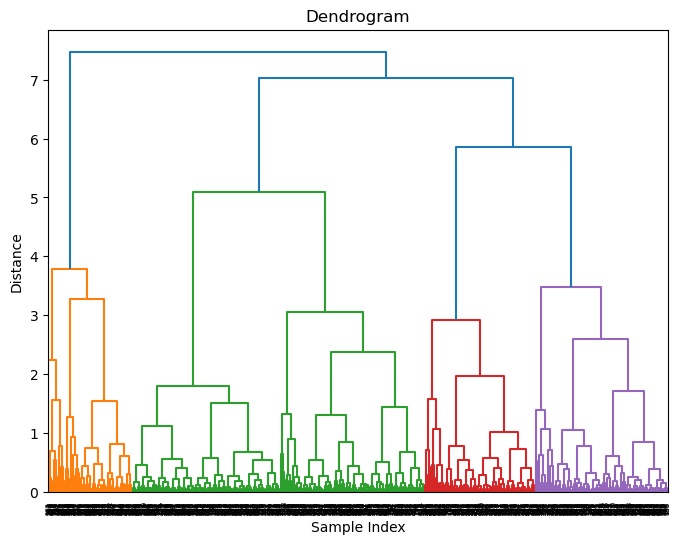

Cluster Labels: [4 2 1 4 4 4 3 2 2 2 3 2 1 3 2 2 4 2 2 2 2 2 2 4 2 3 2 2 2 2 2 2 2 3 2 3 2
 2 3 4 4 3 2 3 2 4 2 1 4 3 2 4 1 4 4 4 2 2 2 4 4 4 2 2 3 2 2 3 3 3 3 4 2 3
 4 2 4 2 3 2 2 2 3 2 2 2 3 2 2 2 4 1 2 4 2 1 3 2 4 1 2 2 2 3 4 2 1 2 3 2 2
 3 1 3 1 2 4 3 2 1 2 4 4 4 2 2 2 2 4 1 2 2 2 1 2 4 2 3 2 2 2 2 2 4 2 4 2 2
 2 3 3 4 2 3 2 2 1 2 2 2 2 2 1 2 3 2 1 3 3 4 2 2 3 1 3 1 4 4 2 2 2 4 4 1 2
 4 4 2 1 2 2 2 2 2 2 2 2 4 2 2 2 4 3 2 2 2 4 4 3 1 2 2 4 2 2 2 3 2 4 4 4 4
 1 3 3 2 4 2 2 2 3 2 3 1 1 1 1 2 2 2 3 2 4 4 2 3 4 1 1 1 4 3 4 2 2 4 4 3 2
 4 4 4 2 4 1 2 2 2 3 4 4 3 2 3 2 3 2 2 3 3 3 1 2 2 1 2 4 3 2 1 3 2 2 2 2 2
 3 2 3 4 2 3 4 3 4 2 4 2 3 2 2 4 1 2 4 2 2 2 2 3 1 2 2 2 3 4 1 2 2 2 2 3 1
 1 4 1 4 1 2 2 2 1 2 2 4 2 2 2 3 1 4 3 4 4 1 2 2 4 2 1 3 2 3 2 3 3 3 4 4 3
 2 2 3 4 3 2 4 2 2 2 2 2 3 1 3 2 2 2 4 2 1 3 3 3 2 2 2 2 2 2 2 3 4 3 2 2 2
 2 3 4 2 2 3 2 3 4 3 1 1 3 3 2 2 2 2 4 1 2 4 2 3 1 2 2 3 2 4 2 4 3 2 2 3 1
 3 4 1 1 2 2 4 4 1 2 1 3 1 2 3 2 1 1 1 3 2 3 3 3 4 3 2 2 2 2 2 2 4 4 2 4 1
 3 2 4 2 

In [12]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Step 1: Compute pairwise distances
distance_matrix = sch.distance.pdist(df_expanded)

# Step 2: Perform hierarchical clustering
linkage_matrix = sch.linkage(distance_matrix, method='ward')

# Step 3: Plot the dendrogram
plt.figure(figsize=(8, 6))
sch.dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Step 4: Form clusters 
n_clusters = 4
clusters = sch.fcluster(linkage_matrix, n_clusters, criterion='maxclust')
print("Cluster Labels:", clusters)

# Direct clustering using scikit-learn
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agg_clustering.fit_predict(df_expanded)
print("Scikit-Learn Cluster Labels:", labels)

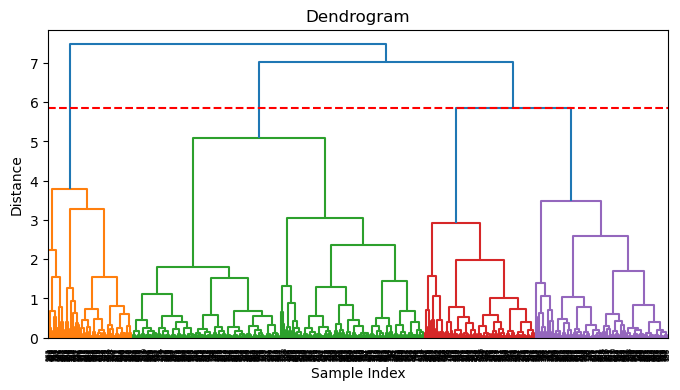

In [13]:
plt.figure(figsize=(8, 4))
dendrogram = sch.dendrogram(linkage_matrix)  
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")

# Calculate the threshold for 4 clusters
n_clusters = 4
threshold = linkage_matrix[-n_clusters + 1, 2] 
# Add a horizontal line to indicate the cut
plt.axhline(y=threshold, color='r', linestyle='--')
plt.show()